# Ансамбли моделей

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Основная идея:

* строятся базовые модели, отличающиеся друг от друга
* агрегация прогнозов в ансамбль с применением мета-алгоритма

Агрегация:



In [28]:
from sklearn.datasets import load_iris

iris = load_iris()
#iris.target[125] = 1

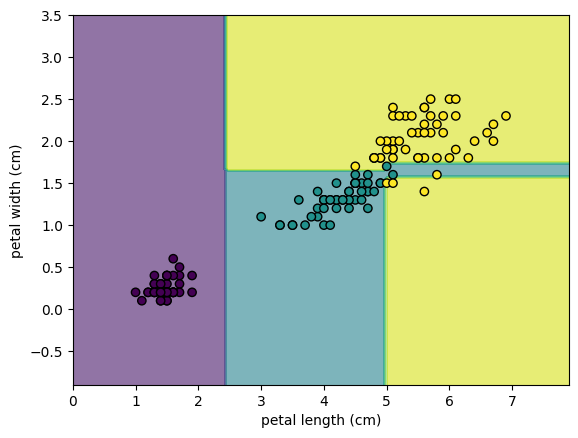

In [29]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.inspection import DecisionBoundaryDisplay
#позволяет визуализировать границы принятия решений обученной модели с указанной цветовой картой

X = iris.data[:, 2:4]

tree = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X, iris.target)

fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    tree,
    X,
    response_method="predict",
    alpha=0.6,
    ax=ax,
    xlabel=iris.feature_names[2],
    ylabel=iris.feature_names[3],
    cmap=plt.cm.viridis
)

disp.ax_.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, edgecolor="black")

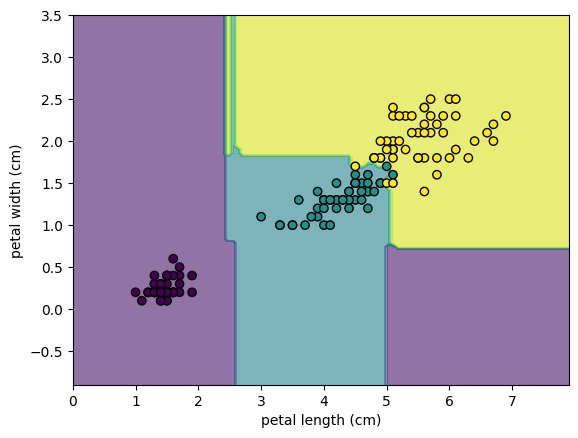

In [30]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
#позволяет визуализировать границы принятия решений обученной модели с указанной цветовой картой

X = iris.data[:, 2:4]

rf = RandomForestClassifier(n_estimators=50, max_depth=4).fit(X, iris.target)

fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    rf,
    X,
    response_method="predict",
    alpha=0.6,
    ax=ax,
    xlabel=iris.feature_names[2],
    ylabel=iris.feature_names[3],
    cmap=plt.cm.viridis
)

disp.ax_.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, edgecolor="black")

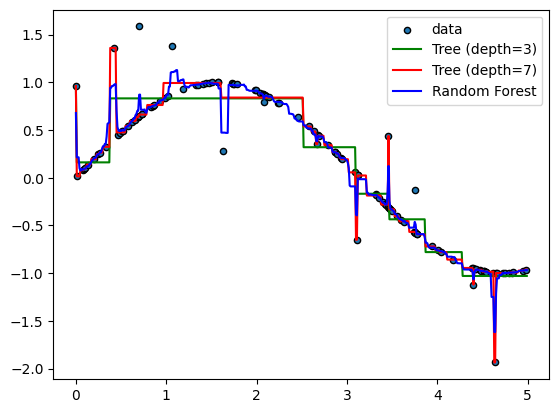

In [31]:
rng = np.random.RandomState(1)

X = np.sort(5* rng.rand(120,1), axis = 0)
y = np.sin(X).ravel()
y[::10] += 2 * (0.5- rng.rand(12))

tree1 = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X, y)
tree2 = DecisionTreeRegressor(max_depth=7, random_state=42).fit(X, y)
rf = RandomForestRegressor(random_state=42).fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:,np.newaxis]

plt.scatter(X, y, s=20, edgecolor="black", label="data")
plt.plot(X_test, tree1.predict(X_test), color="green", label="Tree (depth=3)")
plt.plot(X_test, tree2.predict(X_test), color="red", label="Tree (depth=7)")
plt.plot(X_test, rf.predict(X_test), color="blue", label="Random Forest")

plt.legend()
plt.show()

# Регрессия

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
df = pd.read_csv('loan_data.csv', sep=',')
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [46]:
df.select_dtypes(include=['object']).columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder
lab_encoder = LabelEncoder()

df["person_gender"] = lab_encoder.fit_transform(df["person_gender"])
df["previous_loan_defaults_on_file"] = lab_encoder.fit_transform(df["previous_loan_defaults_on_file"])
df = pd.get_dummies(df, columns = ['person_education'], prefix = '', prefix_sep = '', drop_first = True)
df = pd.get_dummies(df, columns = ['person_home_ownership'], prefix = '', prefix_sep = '', drop_first = True)
df = pd.get_dummies(df, columns = ['loan_intent'], prefix = '', prefix_sep = '', drop_first = True)

df.head(3)

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,High School,Master,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,False,True,False,False,True,False,False,False,True,False
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,True,False,False,True,False,True,False,False,False,False
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,True,False,False,False,False,False,False,True,False,False


In [51]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('F1 = ', metrics.f1_score(y_test, y_pred))

F1 =  0.7696531070626403


In [56]:
rf = RandomForestClassifier(n_estimators=100, max_samples=0.15, oob_score=True, max_features=5, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('F1 = ', metrics.f1_score(y_test, y_pred))

F1 =  0.8176645895421295


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

clf = make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42))

clf.fit(X_train, y_train).score(X_test, y_test)

0.8994444444444445

In [58]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

0.9244444444444444

# K-кратная перекрестная проверка

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.8422669 , 0.84737182, 0.84158067, 0.85214063, 0.86265561])

In [38]:
print('score = %0.3f ± %0.3f' % (np.mean(scores), np.std(scores)))

score = 0.849 ± 0.008
